In [29]:
import py_plantbox as pb #CPlantBox Python Binding
from rb_tools import * # CRootBox nodes Conversion tools
import datetime

import matplotlib.pylab as plt
import numpy as np
import timeit
import os

def CPlantBox(name, time, output = "morning_glory_7m"): #define a function, in line 20, we can run it in one line of code
    plant = pb.Plant()
    plant.openXML(name)
    plant.initialize()
    plant.simulate(time)
    plant.write("../results/{}.vtp".format(output),15)
    return plant;
    
name = "morning_glory_7m"
time = 180 #days
CPlantBox(name, time, name)

In [21]:
from PiafMunch import *
def CPlantBox_PiafMunch(name, time, output = "test_output"):
    plant = pb.Plant()
    plant.openXML(name)
    plant.initialize()
    plant.simulate(time)
    plant.write("../results/{}.vtp".format(output),15)
    node_connection, nodes_organtype, nodes_r_st, unq_cnt  = convert( plant )
    return node_connection, nodes_organtype, nodes_r_st, unq_cnt ;

In [22]:
node_connection, nodes_organtype , nodes_r_st, unq_cnt = CPlantBox_PiafMunch(name, time, name)


node_connection length is211
40.5222013393197
50.87771678838207
88.48520246053131
21.890604093330037
19.598523764883904
186.90332430447924


[]
[]


(<function PiafMunch.write_PiafMunch_parameter.<locals>.assign_source_loading_speed(nodes_organtype, value=0.000143136)>,
 <function PiafMunch.write_PiafMunch_parameter.<locals>.assign_sink_unloading_speed(nodes_organtype, value=2.82627e+95)>,
 <function PiafMunch.write_PiafMunch_parameter.<locals>.create_piafmunch_parameter(unq_cnt=array([1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2

In [23]:
assign_source_loading_speed, assign_sink_unloading_speed, create_piafmunch_parameter = write_PiafMunch_parameter(node_connection, nodes_organtype, nodes_r_st, unq_cnt) 


create_piafmunch_parameter(unq_cnt= unq_cnt,  name= "mg_low1.ini" , end_time = "100" )

[]
[]
output successful


/home/xr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: read_table is deprecated, use read_csv instead.
  if sys.path[0] == '':


JW_ST (ml / h)[ 1]


/home/xr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:65: FutureWarning: read_table is deprecated, use read_csv instead.


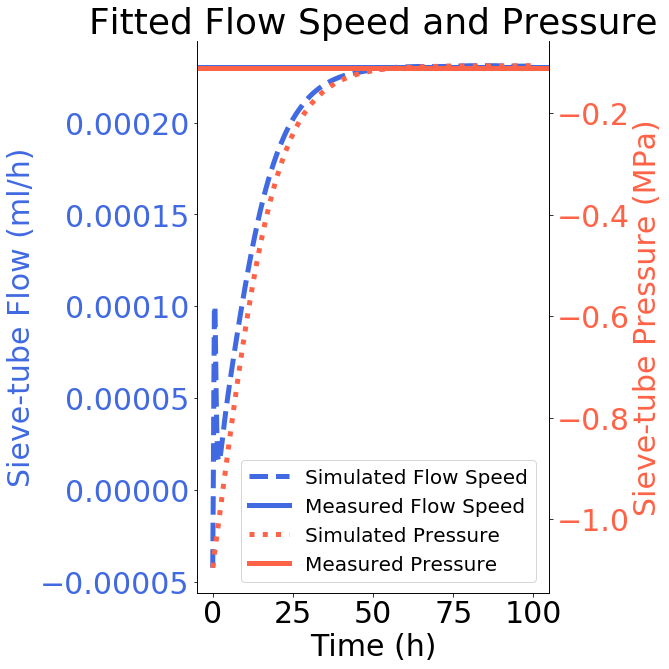

P_ST (MPa)[ 1]


In [28]:

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['font.size'] = 30
from scipy.stats import loglaplace,chi2
fig, ax1 = plt.subplots()
color = 'k'
#plt.title("{}th figure {} with different unloading speed".format(i ,output.columns[n_begin]))
    #from labellines import labelLine, labelLines
for j in range(0,1):
    
    path = '{}{}_output.txt'.format(piaf_munch_p_name, j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)
    ### C_ST
    time = np.array(output.iloc[:, 0])
    n_begin = (len(node_connection)+1)*3+1
    n_end = n_begin +(len(node_connection))
    #print(output.iloc[2, n_begin:n_end])
    N1L_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & ((nodes_organtype[:,1] ==8)|(nodes_organtype[:,1] ==4)  ) & (nodes_organtype[:,2] ==1 )]
    N1R_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & (nodes_organtype[:,1] ==2 ) & (nodes_organtype[:,2] ==1 )]
    N2_node = nodes_organtype[ (nodes_organtype[:,2] ==2 )]
    N3_node = nodes_organtype[ (nodes_organtype[:,2] ==3 )]
    
    var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
    var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
    var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
    var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
    var_all = np.array(output.iloc[:,n_begin:n_end])
    for i in range(31,32):

        JW_XYL = (len(node_connection+1))*i+31 # careful here is the number of connections but bot nodes
        n_end = n_begin +(len(node_connection)-1)
        var_all = np.array(output.iloc[:,JW_XYL:JW_XYL+len(node_connection)])
        time = np.array(output.iloc[:, 0])

        x = np.array(time)
        y = np.array(var_all)

        ax1.set_xlabel("Time (h)")
        ax1.set_ylabel("Sieve-tube Flow (ml/h)",color='royalblue')
        

    #     for i in range(len(np.transpose(y))):
    #         plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    #plt.plot(x,[pt[84:85] for pt in y],label = 'Unloading speed at the end of simulation{:.07}(ml/ h) '.format((vMU_x[1]*cst_all[99] / (kMU_x[1] +cst_all[99]))[0]))
    ax1.plot(x,[pt[84:85] for pt in y],label = 'Simulated Flow Speed'.format(), linewidth=5, linestyle='--',color='royalblue')

    #plt.axhline(y=0.23, color='r', linestyle='-', label='all the volume')
ax1.axhline(y=0.00023, color='royalblue', linestyle='-', label='Measured Flow Speed', linewidth=5)
ax1.spines['top'].set_visible(False)
#ax1.legend()
ax1.tick_params(axis='y', labelcolor='royalblue')
#     labelLines(plt.gca().get_lines(), xvals=(0, 5), zorder=0)
#plt.show()
print(output.columns[JW_XYL])
s =output.columns[n_begin]
s = s.replace('/', '')
    #f.savefig("{}.pdf".format(s), bbox_inches='tight')
ax2 = ax1.twinx()    
#f = plt.figure()
    #from labellines import labelLine, labelLines
for j in range(0,1):
    
    path = '{}{}_output.txt'.format(piaf_munch_p_name, j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)
    ### C_ST
    time = np.array(output.iloc[:, 0])
    n_begin = (len(node_connection)+1)*3+1
    n_end = n_begin +(len(node_connection))
    #print(output.iloc[2, n_begin:n_end])

    var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
    var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
    var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
    var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
    var_all = np.array(output.iloc[:,n_begin:n_end])
    for i in range(15,16): #NO. of the output (15,16) is pressure

        n_begin = (len(node_connection+1))*i+16 # careful here is the number of connections but not nodes
        n_end = n_begin +(len(node_connection)-1)
        var_all = np.array(output.iloc[:,n_begin:n_end])
        time = np.array(output.iloc[:, 0])

        x = np.array(time)
        y = np.array(var_all)
        sim_p = np.zeros(5)
        total_p= np.zeros(101)
        node_p_no = [70,94,118,166,178]
        i=0
        j=0
        for j in range(0,101):
            for i in range(0,5):
                sim_p[i] = [pt[node_p_no[i]:node_p_no[i]+1] for pt in y][j][0]
                total_p[j] = total_p[j] + sim_p[i]
        ax2.plot(x,total_p/5,label = 'Simulated Pressure'.format(),ls=':' , linewidth=5,color='tomato')
        measuredp = -0.6+(1.11-0.59)
        measuredp
        #ax2.set_xlabel("Time")
        ax2.set_ylabel("Sieve-tube Pressure (MPa)".format(output.columns[n_begin]),color='tomato')
        plt.title("Fitted Flow Speed and Pressure".format(i ,output.columns[n_begin]))
ax2.spines['top'].set_visible(False)
    #     for i in range(len(np.transpose(y))):
    #         plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
#     plt.plot(x,[pt[84:85] for pt in y],label = '{} ()'.format(vMU_x[j]))
ax2.axhline(y=-0.6+(1.08-0.59), color='tomato', linestyle='-', label='Measured Pressure', linewidth=5)
#ax2.axhline(y=total_p[96]/5, color='b', linestyle='-', label='simulated pressure average')
ax2.tick_params(axis='y', labelcolor='tomato')
fig.tight_layout()
plt.rcParams['font.size'] = 20
fig.legend( loc=(0.36,0.13), shadow=False)
#     labelLines(plt.gca().get_lines(), xvals=(0, 5), zorder=0)
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
    #f.savefig("{}.pdf".format(s), bbox_inches='tight')
    
print(output.columns[n_begin])

In [24]:
# Write estimation algorithms
# for average pressure / real xylem pressure
import datetime

now = datetime.datetime.now()
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [12, 12]
#piaf_munch_p_name = 'averageP{}connection_{}'.format(name, len(node_connection) )  #parameter name of piaf munch-- you name it
piaf_munch_p_name = 'realxylem{}connection_{}'.format(name, len(node_connection) )  #parameter name of piaf munch-- you name it


piaf_munch_path ='./'

vMU_x = np.zeros(10)
#need to lower the unloading speed and increase the loading speed. Because flow and pressure are both less 
vMU_x[0] =1.191855954263808e+97  #
vML_x = np.zeros(10)
vML_x[0] =0.00014*0.049*1.06 *0.9#* 0.844#
kMU_x = np.zeros(10)
kMU_x[0] =  1e99 
kML_x = np.zeros(10)
kML_x[0] = 1e-100

for i in range(1,10):
    vMU_x[i] = vMU_x[i-1] 
    vML_x[i] = vML_x[i-1]  
    kMU_x[i] = kMU_x[i-1]
    kML_x[i] = kML_x[i-1] #* 2
#vMU_x


#for i in range(1,4):
        
rst_x = np.zeros(10)
rst_x[0] =1
for i in range(1,10):
    rst_x[i] = rst_x[i-1] 
rst_x   

def run_sim(node_connection,nodes_organtype, vMU_x,vML_x):
    i=0
    j=0
    assign_sink_unloading_speed (nodes_organtype, vMU_x) #2.82627e+95
    assign_source_loading_speed (nodes_organtype, vML_x)
    rst=(nodes_r_st/rst_x[i])
    r_ST = np.full(len(nodes_organtype), rst)  
    create_piafmunch_parameter( end_time = "100" )
    os.system(' /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe mg_low1.ini -noGUI -q')
    os.system('mv /mnt/c/cpb1/python/mg_low1_2019-{:02}-{:02}*output.txt  ./{}{}_output.txt'.format(now.month, now.day, piaf_munch_p_name ,i) )

    path = '{}{}_output.txt'.format(piaf_munch_p_name, j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)
    time = np.array(output.iloc[:, 0])
    n_begin = (len(node_connection+1))*31+31 # careful here is the number of connections but bot nodes
    n_end = n_begin +(len(node_connection)-1)
    var_all = np.array(output.iloc[:,n_begin:n_end])
    x = np.array(time)
    y = np.array(var_all)
    sim_flow=y[99,85]
    n_begin = (len(node_connection+1))*15+16 # careful here is the number of connections but bot nodes
    n_end = n_begin +(len(node_connection)-1)
    var_all = np.array(output.iloc[:,n_begin:n_end])
    time = np.array(output.iloc[:, 0])

    x = np.array(time)
    y = np.array(var_all)

    node_p_no = [70,94,118,166,178]
    i=0
    j=0
    
    sim_pressure =(y[99,70]+ y[99,94]+ y[99,118]+ y[99,166]+ y[99,178])/5
    print(sim_pressure)
    print(sim_flow)
    return sim_pressure, sim_flow

guess=1.1 
abs_f = np.zeros(100)
abs_p = np.zeros(100)

guess_vml =1.1
guess_vmu =1.1

In [25]:
vMU_x[0] =1.191855954263808e+97 #
vML_x[0] =6.4031395909090895e-06#
run_sim(node_connection,nodes_organtype,vMU_x[0],vML_x[0])

output successful


/home/xr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:53: FutureWarning: read_table is deprecated, use read_csv instead.


-0.10630686
0.000228342


(-0.10630686, 0.000228342)

In [ ]:

    #name = "morning_glory_7m" # Simulate a 7 meter morning glory
    #name = 'Brassica_napus_a_Leitner_2010_test'
    #name = "test_nodes" # Simulate a 2.5 meter morning glory
    #name = "morning_glory_3.5m_d" # Simulate a 3.5 meter morning glory
    #name = "morning_glory_9m_d" # Simulate a 9 meter morning glory
    #name = "morning_glory_10m_d" # Simulate a 10 meter morning glory
    #name = "morning_glory_14m_d" #Simulate a 14 meter morning glory



    #sca = pb.Organ.getScalar('organtype')

    #for i in range (0,180):
    #    plant.simulate(i)
    # for i in range(0,7):
    #     plant.simulate(1) 



    #seg = np.vstack((seg,lseg))
    # print("number of root segments",len(rseg))
    # print("number of shoot segments",len(sseg))
    # print("number of segments",len(seg))

    #rootnodes = v2a(sca('organtype'))

    #print(rseg)
    #print(sseg)
    #print(lseg)
    #print(sseg[1])

    #print(len(nodes))
    #print(len(rseg))
    #print(len(lseg))



    plant.write("../results/{}.vtp".format(output),15)

In [ ]:
# for average pressure / real xylem pressure
import datetime

now = datetime.datetime.now()
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [12, 12]
#piaf_munch_p_name = 'averageP{}connection_{}'.format(name, len(node_connection) )  #parameter name of piaf munch-- you name it
piaf_munch_p_name = 'realxylem{}connection_{}'.format(name, len(node_connection) )  #parameter name of piaf munch-- you name it


piaf_munch_path ='./'

vMU_x = np.zeros(10)
#need to lower the unloading speed and increase the loading speed. Because flow and pressure are both less  1.191855954263808e+97 6.4031395909090895e-06
vMU_x[0] =1.191855954263808e+97 #
vML_x = np.zeros(10)
vML_x[0] =6.4031395909090895e-06#
kMU_x = np.zeros(10)
kMU_x[0] =  1e99 
kML_x = np.zeros(10)
kML_x[0] = 1e-100

for i in range(1,10):
    vMU_x[i] = vMU_x[i-1] 
    vML_x[i] = vML_x[i-1]  
    kMU_x[i] = kMU_x[i-1]
    kML_x[i] = kML_x[i-1] #* 2
#vMU_x


#for i in range(1,4):
        
rst_x = np.zeros(10)
rst_x[0] =1
for i in range(1,10):
    rst_x[i] = rst_x[i-1] 
rst_x   


# for i in range(len(vMU_x)):
for i in range(0,1):
    assign_sink_unloading_speed (vMU_x[i]) #2.82627e+95
    assign_source_loading_speed (vML_x[i])
    rst=(nodes_r_st/rst_x[i])
    r_ST = np.full(len(nodes_organtype), rst)  
    create_piafmunch_parameter( end_time = "100" )
    os.system(' /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe mg_low1.ini -noGUI -q')
    os.system('mv /mnt/c/cpb1/python/mg_low1_2019-{:02}-{:02}*output.txt  ./{}{}_output.txt'.format(now.month, now.day, piaf_munch_p_name ,i) )


plt.rcParams['figure.figsize'] = [12, 12]
from scipy.stats import loglaplace,chi2
f = plt.figure()
    #from labellines import labelLine, labelLines
for j in range(0,1):
    
    path = '{}{}_output.txt'.format(piaf_munch_p_name, j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)

    #print(output.iloc[2, n_begin:n_end])

    for i in range(31,32):

        n_begin = (len(node_connection+1))*i+31 # careful here is the number of connections but bot nodes
        n_end = n_begin +(len(node_connection)-1)
        var_all = np.array(output.iloc[:,n_begin:n_end])
        time = np.array(output.iloc[:, 0])

        x = np.array(time)
        y = np.array(var_all)
        
        plt.xlabel("Time")
        plt.ylabel("Sieve tube flow speed(ml/h)")
        plt.title("{}th figure {} with different unloading speed".format(i ,output.columns[n_begin]))

    #     for i in range(len(np.transpose(y))):
    #         plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    plt.plot(x,[pt[84:85] for pt in y],label = '{}() '.format("flow on 84th node in simulation"))#vMU_x[j]
#plt.axhline(y=0.23, color='r', linestyle='-', label='all the volume')
plt.axhline(y=0.00023, color='r', linestyle='-', label='volume of single sieve tube')
plt.legend()
#     labelLines(plt.gca().get_lines(), xvals=(0, 5), zorder=0)
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
    #f.savefig("{}.pdf".format(s), bbox_inches='tight')
    
f = plt.figure()
    #from labellines import labelLine, labelLines
for j in range(0,1):
    
    path = '{}{}_output.txt'.format(piaf_munch_p_name, j)
    #pd.read_table(path,sep='\t')
    output = pd.read_table(path,sep='\t',header=1)
    ### C_ST
    time = np.array(output.iloc[:, 0])
    n_begin = (len(node_connection)+1)*3+1
    n_end = n_begin +(len(node_connection))
    #print(output.iloc[2, n_begin:n_end])

    for i in range(15,16): #NO. of the output (15,16) is pressure

        n_begin = (len(node_connection+1))*i+16 # careful here is the number of connections but bot nodes
        n_end = n_begin +(len(node_connection)-1)
        var_all = np.array(output.iloc[:,n_begin:n_end])
        time = np.array(output.iloc[:, 0])

        x = np.array(time)
        y = np.array(var_all)

        plt.xlabel("Time")
        plt.ylabel("Pressure in sieve tubes{}".format(output.columns[n_begin]))
        plt.title("{}th figure {} with different unloading speed".format(i ,output.columns[n_begin]))

    #     for i in range(len(np.transpose(y))):
    #         plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    
    sim_p = np.zeros(5)
    total_p= np.zeros(101)
    node_p_no = [70,94,118,166,178]
    i=0
    j=0
    for j in range(0,101):
        for i in range(0,5):
            sim_p[i] = [pt[node_p_no[i]:node_p_no[i]+1] for pt in y][j][0]
            total_p[j] = total_p[j] + sim_p[i]
    plt.plot(x,total_p/5,label = 'Simulated Pressure'.format(),ls=':' , linewidth=5,color='tomato')
    measuredp = -0.6+(1.11-0.59)
    measuredp
    #ax2.set_xlabel("Time")

plt.axhline(y=-0.6+(1.08-0.59), color='b', linestyle='-', label='target pressure upper limit')
# plt.axhline(y=-0.6+(2.5-0.59), color='b', linestyle='-', label='target pressure lower limit')
plt.legend()
#     labelLines(plt.gca().get_lines(), xvals=(0, 5), zorder=0)
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
#     f.savefig("{}.pdf".format(s), bbox_inches='tight')